## 데이터 처리 환경설정

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### 데이터 불러오기

In [3]:
df_sam2_ori = pd.read_csv('./data/want_data.csv')

In [4]:
df_sam2 = df_sam2_ori.sort_values(['PID', 'AGE']).copy()

In [ ]:
df_sam2[['PID','AGE','EyE','Exam Date','Exam Year']]

In [5]:
df_sam2.head(3)

,PID,AGE,Eye,Exam Date,Exam ID,Pupil diameter,False positive percent,False negative percent,Fixation loss,Fixation trial,Exam duration(min),GHT,MD,MD probability,PSD,PSD probability,VFI,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_26,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,...,real_THV_5,real_THV_6,real_THV_7,real_THV_8,real_THV_9,real_THV_10,real_THV_11,real_THV_12,real_THV_13,real_THV_14,real_THV_15,real_THV_16,real_THV_17,real_THV_18,real_THV_19,real_THV_20,real_THV_21,real_THV_22,real_THV_23,real_THV_24,real_THV_25,real_THV_26,real_THV_27,real_THV_28,real_THV_29,real_THV_30,real_THV_31,real_THV_32,real_THV_33,real_THV_34,real_THV_35,real_THV_36,real_THV_37,real_THV_38,real_THV_39,real_THV_40,real_THV_41,real_THV_42,real_THV_43,real_THV_44,real_THV_45,real_THV_46,real_THV_47,real_THV_48,real_THV_49,real_THV_50,real_THV_51,real_THV_52,real_THV_53,real_THV_54
0,2,51,OS,2010-11-19 10:32:01,NaN,6.4,1,0,0,13,4,2,-0.98,0,1.54,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,NaN,0,0,3,0,0,0,0,...,28,31,29,30,31,28,29,29,31,32,30,27,28,29,29,26,29,26,25,31,31,NaN,29,26,27,30,32,32,30,29,NaN,32,29,31,29,33,30,26,31,29,29,33,28,31,30,30,26,30,30,30
1,2,51,OD,2010-11-19 10:25:16,NaN,6.4,1,3,0,16,5,1,-1.82,1,1.62,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,34,31,26,28,25,28,26,31,30,32,29,24,30,27,29,27,29,29,26,29,29,NaN,27,22,31,30,30,32,31,29,NaN,25,29,30,29,30,30,25,29,29,30,29,29,28,30,29,28,29,30,28
2,2,52,OS,2011-11-11 08:45:17,NaN,0.0,1,0,1,13,4,1,-0.51,0,1.27,0,100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,...,28,31,29,27,28,27,28,30,31,31,32,29,31,29,31,31,30,30,31,31,32,NaN,29,26,31,30,33,31,30,33,NaN,31,30,31,30,34,31,27,29,30,29,32,27,29,29,27,27,29,32,29


### 2번 환자를 예시로 작업 전개

In [6]:
pid_2 = df_sam2[(df_sam2['PID']==2) & (df_sam2['Eye']=='OS')].copy()
pid_2['Exam Date'] = pid_2['Exam Date'].apply(lambda x : x[:10])
X = pd.to_datetime(pid_2['Exam Date']).map(dt.datetime.toordinal)
y = pid_2.iloc[:, 17:].dropna(axis = 1)
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

predict_list = np.round(line_fitter.predict([[X.iloc[-1]+365]]), 1)[0]
y.index = pid_2['Exam Date']
pre_df = pd.concat([y, pd.DataFrame(predict_list, index = y.columns, columns = ['next_year']).T])
pre_df

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
2010-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,3.0,-1.0,1.0,0.0,0.0,2.0,1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-2.0,0.0,0.0,-2.0,-2.0,-4.0,-4.0,-1.0,-1.0,-1.0,-1.0,-6.0,-2.0,-1.0,-1.0,-2.0,-3.0,1.0,-2.0,0.0,-1.0,1.0,-2.0,-1.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-3.0,0.0,0.0,0.0
2011-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-1.0,1.0,0.0,-3.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,2.0,1.0,0.0,2.0,3.0,-1.0,0.0,2.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,0.0,-2.0,-2.0,1.0,0.0,-1.0,0.0,0.0,2.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,-2.0,-3.0,-2.0,-1.0,2.0,-1.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-3.0,3.0,1.0,-1.0,0.0,-1.0,4.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,-2.0,-3.0,-2.0,-1.0,-1.0,-2.0,-1.0,-5.0,-3.0,-1.0,0.0,0.0,-1.0,-2.0,-1.0,-5.0,0.0,2.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,-1.0,-1.0,0.0,-1.0,-3.0,-1.0,-2.0,2.0,0.0,-1.0,0.0
2013-10-25,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,-4.0,-1.0,-1.0,-1.0,1.0,1.0,3.0,-1.0,-1.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,-3.0,0.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,1.0,-1.0,1.0,1.0,-1.0,-2.0,0.0,-1.0,2.0,-1.0,-2.0,-2.0,-2.0,0.0,2.0,1.0,0.0,0.0,-1.0,-1.0
2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,2.0,-3.0,-2.0,0.0,0.0,1.0,2.0,2.0,0.0,-1.0,2.0,7.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,2.0,1.0,3.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0
2015-10-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-4.0,1.0,0.0,-3.0,-1.0,1.0,-2.0,-1.0,-2.0,-3.0,-1.0,1.0,-1.0,-2.0,-2.0,1.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,-2.0,0.0,-2.0,1.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-5.0,-2.0
2017-10-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,-1.0,2.0,2.0,-1.0,1.0,-2.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,-1.0,-2.0,1.0,1.0,-3.0,0.0,2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,-2.0,-1.0,-1.0,-1.0,1.0,-3.0,-1.0,0.0,0.0,-3.0,1.0,1.0,2.0,2.0,1.0,2.0,-1.0
next_year,0.0,0.0,0.0,0.4,0.2,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,1.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.6,-0.9,0.0,2.2,0.0,0.0,-0.9,0.0,0.1,0.8,0.0,-0.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,2.1,-0.2,-0.2,0.0,0.0,0.0,

## 환자 개인의 녹내장 예측 함수

In [7]:
def predict_person(pid, eye, part):
    
    # 원하는 환자 정보 설정
    pid_person = df_sam2[(df_sam2['PID']==pid) & (df_sam2['Eye']==eye)]
    pid_person['Exam Date'] = pid_person['Exam Date'].apply(lambda x : x[:10])
    
    # Linear Regression 하기 위한 조건 설정
    X = pd.to_datetime(pid_person['Exam Date']).map(dt.datetime.toordinal)
    y = pid_person.iloc[:, 17:].dropna(axis = 1)
    
    line_fitter = LinearRegression()
    line_fitter.fit(X.values.reshape(-1,1), y)
    
    predict_list = np.round(line_fitter.predict([[X.iloc[-1]+365]]), 1)[0]
    
    y.index = pid_person['Exam Date']
    person_df = pd.concat([y, pd.DataFrame(predict_list, index = y.columns, columns = ['next_year']).T])
     
    linear_check_list = ['PDP', 'PDV', 'TDP', 'TDV', 'THV'] 
    # OD 의 경우 시각화
    if pid_person['Eye'].iloc[1]=='OD':
        for j in range(len(linear_check_list)):
            if linear_check_list[j]==part:
                use_ind = j

        img = np.zeros((400, 400, 3), np.uint8)
        if use_ind<=3:
            for i in range(52):
                if i<4:
                    n=0
                    point1 = 120 + 40 * i, 40*n
                    point2 = 160 + 40 * i, 40*(n+1)
                    point3 = 127 + 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 80 + 40 * (i-4), 40*n
                    point2 = 120 + 40 * (i-4), 40*(n+1)
                    point3 = 87 + 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)       

                elif 10<=i<18:
                    n=2
                    point1 = 40 + 40 * (i-10), 40*n
                    point2 = 80 + 40 * (i-10), 40*(n+1)
                    point3 = 47 + 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<26:
                    n=3
                    if 18<=i<25:
                        point1 = 0 + 40 * (i-18), 40*n
                        point2 = 40 + 40 * (i-18), 40*(n+1)
                        point3 = 7 + 40 * (i-18), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==25:    
                        point1 = 40 + 40 * (i-18), 40*n
                        point2 = 80 + 40 * (i-18), 40*(n+1)
                        point3 = 47 + 40 * (i-18), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 26<=i<34:
                    n=4
                    if 26<=i<33:
                        point1 = 0 + 40 * (i-26), 40*n
                        point2 = 40 + 40 * (i-26), 40*(n+1)
                        point3 = 7 + 40 * (i-26), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==33:    
                        point1 = 40 + 40 * (i-26), 40*n
                        point2 = 80 + 40 * (i-26), 40*(n+1)
                        point3 = 47 + 40 * (i-26), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 34<=i<42:
                    n=5
                    point1 = 40 + 40 * (i-34), 40*n
                    point2 = 80 + 40 * (i-34), 40*(n+1)
                    point3 = 47 + 40 * (i-34), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 42<=i<48:
                    n=6
                    point1 = 80 + 40 * (i-42), 40*n
                    point2 = 120 + 40 * (i-42), 40*(n+1)
                    point3 = 87 + 40 * (i-42), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 48<=i:
                    n=7
                    point1 = 120 + 40 * (i-48), 40*n
                    point2 = 160 + 40 * (i-48), 40*(n+1)
                    point3 = 127 + 40 * (i-48), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)   

        elif use_ind<=4:
            use_ind = 2
            for i in range(54):
                if i<4:
                    n=0
                    point1 = 120 + 40 * i, 40*n
                    point2 = 160 + 40 * i, 40*(n+1)
                    point3 = 127 + 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 80 + 40 * (i-4), 40*n
                    point2 = 120 + 40 * (i-4), 40*(n+1)
                    point3 = 87 + 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)    

                elif 10<=i<18:
                    n=2
                    point1 = 40 + 40 * (i-10), 40*n
                    point2 = 80 + 40 * (i-10), 40*(n+1)
                    point3 = 47 + 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<27:
                    n=3
                    point1 = 0 + 40 * (i-18), 40*n
                    point2 = 40 + 40 * (i-18), 40*(n+1)
                    point3 = 7 + 40 * (i-18), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)


                elif 27<=i<36:
                    n=4
                    point1 = 0 + 40 * (i-27), 40*n
                    point2 = 40 + 40 * (i-27), 40*(n+1)
                    point3 = 7 + 40 * (i-27), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 36<=i<44:
                    n=5
                    point1 = 40 + 40 * (i-36), 40*n
                    point2 = 80 + 40 * (i-36), 40*(n+1)
                    point3 = 47 + 40 * (i-36), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 44<=i<50:
                    n=6
                    point1 = 80 + 40 * (i-44), 40*n
                    point2 = 120 + 40 * (i-44), 40*(n+1)
                    point3 = 87 + 40 * (i-44), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 50<=i:
                    n=7
                    point1 = 120 + 40 * (i-50), 40*n
                    point2 = 160 + 40 * (i-50), 40*(n+1)
                    point3 = 127 + 40 * (i-50), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

    
    # OS의 경우 시각화
    elif pid_person['Eye'].iloc[1]=='OS':
        for j in range(len(linear_check_list)):
            if linear_check_list[j]==part:
                use_ind = j

        img = np.zeros((400, 400, 3), np.uint8)
        if use_ind<=3:
            for i in range(52):
                if i<4:
                    n=0
                    point1 = 240 - 40 * i, 40*n
                    point2 = 280 - 40 * i, 40*(n+1)
                    point3 = 247 - 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 280 - 40 * (i-4), 40*n
                    point2 = 320 - 40 * (i-4), 40*(n+1)
                    point3 = 287 - 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)       

                elif 10<=i<18:
                    n=2
                    point1 = 320 - 40 * (i-10), 40*n
                    point2 = 360 - 40 * (i-10), 40*(n+1)
                    point3 = 327 - 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<26:
                    n=3
                    if 18<=i<25:
                        point1 = 360 - 40 * (i-18), 40*n
                        point2 = 400 - 40 * (i-18), 40*(n+1)
                        point3 = 367 - 40 * (i-18), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==25:    
                        point1 = 40, 40*n
                        point2 = 80, 40*(n+1)
                        point3 = 47, 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 26<=i<34:
                    n=4
                    if 26<=i<33:
                        point1 = 360 - 40 * (i-26), 40*n
                        point2 = 400 - 40 * (i-26), 40*(n+1)
                        point3 = 367 - 40 * (i-26), 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                    elif i==33:    
                        point1 = 40, 40*n
                        point2 = 80, 40*(n+1)
                        point3 = 47, 40*n+22
                        img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                        if use_ind<=1:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)
                        elif use_ind>=2:
                            img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                             thickness = 2)

                elif 34<=i<42:
                    n=5
                    point1 = 320 - 40 * (i-34), 40*n
                    point2 = 360 - 40 * (i-34), 40*(n+1)
                    point3 = 327 - 40 * (i-34), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 42<=i<48:
                    n=6
                    point1 = 280 - 40 * (i-42), 40*n
                    point2 = 320 - 40 * (i-42), 40*(n+1)
                    point3 = 287 - 40 * (i-42), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 48<=i:
                    n=7
                    point1 = 240 - 40 * (i-48), 40*n
                    point2 = 280 - 40 * (i-48), 40*(n+1)
                    point3 = 247 - 40 * (i-48), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    if use_ind<=1:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)
                    elif use_ind>=2:
                        img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)+54]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)   

        elif use_ind<=4:
            use_ind = 2
            for i in range(54):
                if i<4:
                    n=0
                    point1 = 240 - 40 * i, 40*n
                    point2 = 280 - 40 * i, 40*(n+1)
                    point3 = 247 - 40 * i, 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 4<=i<10:
                    n=1
                    point1 = 280 - 40 * (i-4), 40*n
                    point2 = 320 - 40 * (i-4), 40*(n+1)
                    point3 = 287 - 40 * (i-4), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)    

                elif 10<=i<18:
                    n=2
                    point1 = 320 - 40 * (i-10), 40*n
                    point2 = 360 - 40 * (i-10), 40*(n+1)
                    point3 = 327 - 40 * (i-10), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)

                elif 18<=i<27:
                    n=3
                    point1 = 360 - 40 * (i-18), 40*n
                    point2 = 400 - 40 * (i-18), 40*(n+1)
                    point3 = 367 - 40 * (i-18), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                         thickness = 2)


                elif 27<=i<36:
                    n=4
                    point1 = 360 - 40 * (i-27), 40*n
                    point2 = 400 - 40 * (i-27), 40*(n+1)
                    point3 = 367 - 40 * (i-27), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 36<=i<44:
                    n=5
                    point1 = 320 - 40 * (i-36), 40*n
                    point2 = 360 - 40 * (i-36), 40*(n+1)
                    point3 = 327 - 40 * (i-36), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 44<=i<50:
                    n=6
                    point1 = 280 - 40 * (i-44), 40*n
                    point2 = 320 - 40 * (i-44), 40*(n+1)
                    point3 = 287 - 40 * (i-44), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

                elif 50<=i:
                    n=7
                    point1 = 240 - 40 * (i-50), 40*n
                    point2 = 280 - 40 * (i-50), 40*(n+1)
                    point3 = 247 - 40 * (i-50), 40*n+22
                    img = cv2.rectangle(img, point1, point2, (255, 255, 255), 1)
                    img = cv2.putText(img, str(pre_df.loc['next_year'][i+(52*use_ind)]), point3, 16, 0.4, (255,255,255),
                                     thickness = 2)

    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
    plt.imshow(imgRGB)
    plt.show()
        
    cv2.imshow(part, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return person_df

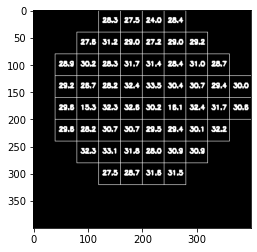

,PDP_01,PDP_02,PDP_03,PDP_04,PDP_05,PDP_06,PDP_07,PDP_08,PDP_09,PDP_10,PDP_11,PDP_12,PDP_13,PDP_14,PDP_15,PDP_16,PDP_17,PDP_18,PDP_19,PDP_20,PDP_21,PDP_22,PDP_23,PDP_24,PDP_25,PDP_27,PDP_28,PDP_29,PDP_30,PDP_31,PDP_32,PDP_33,PDP_34,PDP_36,PDP_37,PDP_38,PDP_39,PDP_40,PDP_41,PDP_42,PDP_43,PDP_44,PDP_45,PDP_46,PDP_47,PDP_48,PDP_49,PDP_50,PDP_51,PDP_52,...,TDV_03,TDV_04,TDV_05,TDV_06,TDV_07,TDV_08,TDV_09,TDV_10,TDV_11,TDV_12,TDV_13,TDV_14,TDV_15,TDV_16,TDV_17,TDV_18,TDV_19,TDV_20,TDV_21,TDV_22,TDV_23,TDV_24,TDV_25,TDV_27,TDV_28,TDV_29,TDV_30,TDV_31,TDV_32,TDV_33,TDV_34,TDV_36,TDV_37,TDV_38,TDV_39,TDV_40,TDV_41,TDV_42,TDV_43,TDV_44,TDV_45,TDV_46,TDV_47,TDV_48,TDV_49,TDV_50,TDV_51,TDV_52,TDV_53,TDV_54
2010-11-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,3.0,-1.0,1.0,0.0,0.0,2.0,1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-2.0,0.0,0.0,-2.0,-2.0,-4.0,-4.0,-1.0,-1.0,-1.0,-1.0,-6.0,-2.0,-1.0,-1.0,-2.0,-3.0,1.0,-2.0,0.0,-1.0,1.0,-2.0,-1.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-3.0,0.0,0.0,0.0
2011-11-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,-1.0,1.0,0.0,-3.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,2.0,1.0,0.0,2.0,3.0,-1.0,0.0,2.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,0.0,-2.0,-2.0,1.0,0.0,-1.0,0.0,0.0,2.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,-2.0,-2.0,-2.0,-3.0,-2.0,-1.0,2.0,-1.0
2012-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-3.0,3.0,1.0,-1.0,0.0,-1.0,4.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,-2.0,-3.0,-2.0,-1.0,-1.0,-2.0,-1.0,-5.0,-3.0,-1.0,0.0,0.0,-1.0,-2.0,-1.0,-5.0,0.0,2.0,-1.0,-1.0,-1.0,0.0,-1.0,-4.0,-1.0,-1.0,0.0,-1.0,-3.0,-1.0,-2.0,2.0,0.0,-1.0,0.0
2013-10-25,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,-4.0,-1.0,-1.0,-1.0,1.0,1.0,3.0,-1.0,-1.0,0.0,-1.0,0.0,3.0,-1.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,-3.0,0.0,2.0,-1.0,-1.0,-2.0,-2.0,0.0,1.0,-1.0,1.0,1.0,-1.0,-2.0,0.0,-1.0,2.0,-1.0,-2.0,-2.0,-2.0,0.0,2.0,1.0,0.0,0.0,-1.0,-1.0
2014-09-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,2.0,-3.0,-2.0,0.0,0.0,1.0,2.0,2.0,0.0,-1.0,2.0,7.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,2.0,1.0,3.0,0.0,0.0,-1.0,1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0
2015-10-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-4.0,1.0,0.0,-3.0,-1.0,1.0,-2.0,-1.0,-2.0,-3.0,-1.0,1.0,-1.0,-2.0,-2.0,1.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,-2.0,0.0,-2.0,1.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,0.0,-5.0,-2.0
2017-10-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,0.0,0.0,-1.0,2.0,2.0,-1.0,1.0,-2.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,-1.0,-2.0,1.0,1.0,-3.0,0.0,2.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,-2.0,-1.0,-1.0,-1.0,1.0,-3.0,-1.0,0.0,0.0,-3.0,1.0,1.0,2.0,2.0,1.0,2.0,-1.0
next_year,0.0,0.0,0.0,0.4,0.2,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,1.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.6,-0.9,0.0,2.2,0.0,0.0,-0.9,0.0,0.1,0.8,0.0,-0.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,2.1,-0.2,-0.2,0.0,0.0,0.0,

In [9]:
predict_person(2, 'OS','THV')